            red     green      blue
0      0.741176  0.435294  0.482353
1      0.729412  0.419608  0.458824
2      0.721569  0.403922  0.454902
3      0.709804  0.384314  0.431373
4      0.694118  0.360784  0.415686
...         ...       ...       ...
81512  0.901961  0.458824  0.498039
81513  0.882353  0.439216  0.470588
81514  0.901961  0.439216  0.466667
81515  0.874510  0.400000  0.427451
81516  0.850980  0.372549  0.396078

[81517 rows x 3 columns]


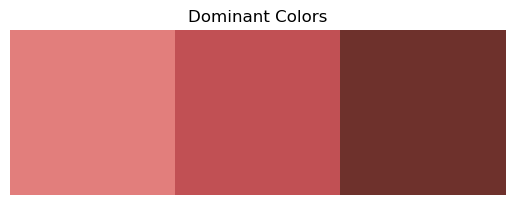

In [26]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
import matplotlib.image as img  # Use matplotlib for image loading

# Path to the folder containing image pairs
folder_path = "/Users/Swetha/Downloads/data_wound_seg/healthy"  # Replace with the actual folder path

# Initialize a list to collect all RGB values
all_rgb_values = []

# Iterate through the image pairs
for i in range(1, 26):  # Assuming there are 25 image pairs
    rgb_path = os.path.join(folder_path, f"rgb{i}.png")
    mask_path = os.path.join(folder_path, f"mask{i}.png")
    
    # Load the RGB image and mask using matplotlib and OpenCV
    rgb_image = img.imread(rgb_path)  # Use matplotlib to read RGB image (values in range [0, 1])
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale using OpenCV
    
    # Check if the images were loaded successfully
    if rgb_image is None or mask is None:
        print(f"Error loading images for pair {i}:")
        print(f"RGB Path: {rgb_path}")
        print(f"Mask Path: {mask_path}")
        continue  # Skip this pair and move to the next iteration

    # Resize RGB image to match the mask's dimensions if needed
    rgb_image = cv2.resize(rgb_image, (mask.shape[1], mask.shape[0]))
    
    # Ensure the mask is binary (0 or 255 values)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    
    # Extract masked region RGB values
    masked_pixels = rgb_image[mask == 255]  # Pixels where the mask is white
    
    if masked_pixels.size == 0:  # Skip if no valid masked pixels
        print(f"No masked pixels found for pair {i}.")
        continue

    # Extract R, G, B values from the masked region
    r, g, b = masked_pixels[:, 0], masked_pixels[:, 1], masked_pixels[:, 2]
    # Append fractional RGB values to the list
    all_rgb_values.extend(zip(r, g, b))

# Convert collected RGB values into a DataFrame
rgb_df = pd.DataFrame(all_rgb_values, columns=['red', 'green', 'blue'])

# No need to rescale as matplotlib already loads values in range [0, 1]
print(rgb_df)

# Cluster the RGB values into 3 dominant colors
cluster_centers, _ = kmeans(rgb_df[['red', 'green', 'blue']], 3)

dominant_colors = []

# Cluster centers will already be in range [0, 1]
for cluster_center in cluster_centers:
    red, green, blue = cluster_center
    dominant_colors.append((red, green, blue))  # Append fractional values directly

# Display colors of cluster centers
plt.imshow([dominant_colors])
plt.axis('off')  # Hide axes for better visualization
plt.title("Dominant Colors")
plt.show()


In [27]:
# Save the dominant colors to a CSV file
healthy_df = pd.DataFrame(dominant_colors, columns=['red', 'green', 'blue'])

# Specify the path where you want to save the dominant colors
output_path = "/Users/Swetha/Downloads/data_wound_seg/healthy.csv"  # Update with your desired file path

# Save to CSV
healthy_df.to_csv(output_path, index=False)

print(f"Dominant colors saved to {output_path}")


Dominant colors saved to /Users/Swetha/Downloads/data_wound_seg/healthy.csv


            red     green      blue
0      0.870588  0.533333  0.474510
1      0.823529  0.470588  0.427451
2      0.862745  0.517647  0.466667
3      0.835294  0.470588  0.439216
4      0.835294  0.482353  0.439216
...         ...       ...       ...
94092  0.592157  0.301961  0.298039
94093  0.631373  0.341176  0.337255
94094  0.654902  0.368627  0.356863
94095  0.643137  0.360784  0.341176
94096  0.643137  0.356863  0.341176

[94097 rows x 3 columns]


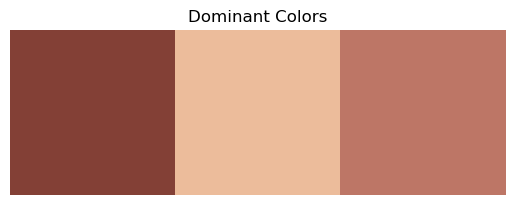

In [28]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
import matplotlib.image as img  # Use matplotlib for image loading

# Path to the folder containing image pairs
folder_path = "/Users/Swetha/Downloads/data_wound_seg/infected"  # Replace with the actual folder path

# Initialize a list to collect all RGB values
all_rgb_values = []

# Iterate through the image pairs
for i in range(1, 26):  # Assuming there are 25 image pairs
    rgb_path = os.path.join(folder_path, f"rgb{i}.png")
    mask_path = os.path.join(folder_path, f"mask{i}.png")
    
    # Load the RGB image and mask using matplotlib and OpenCV
    rgb_image = img.imread(rgb_path)  # Use matplotlib to read RGB image (values in range [0, 1])
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale using OpenCV
    
    # Check if the images were loaded successfully
    if rgb_image is None or mask is None:
        print(f"Error loading images for pair {i}:")
        print(f"RGB Path: {rgb_path}")
        print(f"Mask Path: {mask_path}")
        continue  # Skip this pair and move to the next iteration

    # Resize RGB image to match the mask's dimensions if needed
    rgb_image = cv2.resize(rgb_image, (mask.shape[1], mask.shape[0]))
    
    # Ensure the mask is binary (0 or 255 values)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    
    # Extract masked region RGB values
    masked_pixels = rgb_image[mask == 255]  # Pixels where the mask is white
    
    if masked_pixels.size == 0:  # Skip if no valid masked pixels
        print(f"No masked pixels found for pair {i}.")
        continue

    # Extract R, G, B values from the masked region
    r, g, b = masked_pixels[:, 0], masked_pixels[:, 1], masked_pixels[:, 2]
    # Append fractional RGB values to the list
    all_rgb_values.extend(zip(r, g, b))

# Convert collected RGB values into a DataFrame
rgb_df = pd.DataFrame(all_rgb_values, columns=['red', 'green', 'blue'])

# No need to rescale as matplotlib already loads values in range [0, 1]
print(rgb_df)

# Cluster the RGB values into 3 dominant colors
cluster_centers, _ = kmeans(rgb_df[['red', 'green', 'blue']], 3)

dominant_colors = []

# Cluster centers will already be in range [0, 1]
for cluster_center in cluster_centers:
    red, green, blue = cluster_center
    dominant_colors.append((red, green, blue))  # Append fractional values directly

# Display colors of cluster centers
plt.imshow([dominant_colors])
plt.axis('off')  # Hide axes for better visualization
plt.title("Dominant Colors")
plt.show()


In [29]:
# Save the dominant colors to a CSV file
infected_df = pd.DataFrame(dominant_colors, columns=['red', 'green', 'blue'])

# Specify the path where you want to save the dominant colors
output_path = "/Users/Swetha/Downloads/data_wound_seg/infected.csv"  # Update with your desired file path

# Save to CSV
infected_df.to_csv(output_path, index=False)

print(f"Dominant colors saved to {output_path}")


Dominant colors saved to /Users/Swetha/Downloads/data_wound_seg/infected.csv


             red     green      blue
0       0.431373  0.392157  0.345098
1       0.392157  0.360784  0.309804
2       0.360784  0.333333  0.282353
3       0.364706  0.337255  0.282353
4       0.372549  0.345098  0.294118
...          ...       ...       ...
168885  0.525490  0.352941  0.207843
168886  0.560784  0.388235  0.227451
168887  0.619608  0.439216  0.266667
168888  0.701961  0.545098  0.380392
168889  0.725490  0.549020  0.356863

[168890 rows x 3 columns]


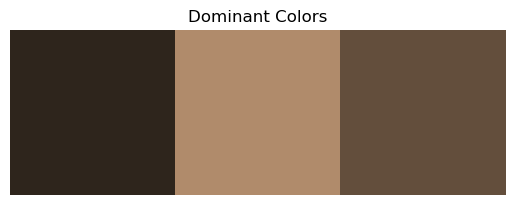

In [31]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
import matplotlib.image as img  # Use matplotlib for image loading

# Path to the folder containing image pairs
folder_path = "/Users/Swetha/Downloads/data_wound_seg/ischemic"  # Replace with the actual folder path

# Initialize a list to collect all RGB values
all_rgb_values = []

# Iterate through the image pairs
for i in range(1, 26):  # Assuming there are 25 image pairs
    rgb_path = os.path.join(folder_path, f"rgb{i}.png")
    mask_path = os.path.join(folder_path, f"mask{i}.png")
    
    # Load the RGB image and mask using matplotlib and OpenCV
    rgb_image = img.imread(rgb_path)  # Use matplotlib to read RGB image (values in range [0, 1])
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale using OpenCV
    
    # Check if the images were loaded successfully
    if rgb_image is None or mask is None:
        print(f"Error loading images for pair {i}:")
        print(f"RGB Path: {rgb_path}")
        print(f"Mask Path: {mask_path}")
        continue  # Skip this pair and move to the next iteration

    # Resize RGB image to match the mask's dimensions if needed
    rgb_image = cv2.resize(rgb_image, (mask.shape[1], mask.shape[0]))
    
    # Ensure the mask is binary (0 or 255 values)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    
    # Extract masked region RGB values
    masked_pixels = rgb_image[mask == 255]  # Pixels where the mask is white
    
    if masked_pixels.size == 0:  # Skip if no valid masked pixels
        print(f"No masked pixels found for pair {i}.")
        continue

    # Extract R, G, B values from the masked region
    r, g, b = masked_pixels[:, 0], masked_pixels[:, 1], masked_pixels[:, 2]
    # Append fractional RGB values to the list
    all_rgb_values.extend(zip(r, g, b))

# Convert collected RGB values into a DataFrame
rgb_df = pd.DataFrame(all_rgb_values, columns=['red', 'green', 'blue'])

# No need to rescale as matplotlib already loads values in range [0, 1]
print(rgb_df)

# Cluster the RGB values into 3 dominant colors
cluster_centers, _ = kmeans(rgb_df[['red', 'green', 'blue']], 3)

dominant_colors = []

# Cluster centers will already be in range [0, 1]
for cluster_center in cluster_centers:
    red, green, blue = cluster_center
    dominant_colors.append((red, green, blue))  # Append fractional values directly

# Display colors of cluster centers
plt.imshow([dominant_colors])
plt.axis('off')  # Hide axes for better visualization
plt.title("Dominant Colors")
plt.show()


In [32]:
# Save the dominant colors to a CSV file
ischemic_df = pd.DataFrame(dominant_colors, columns=['red', 'green', 'blue'])

# Specify the path where you want to save the dominant colors
output_path = "/Users/Swetha/Downloads/data_wound_seg/ischemic.csv"  # Update with your desired file path

# Save to CSV
ischemic_df.to_csv(output_path, index=False)

print(f"Dominant colors saved to {output_path}")

Dominant colors saved to /Users/Swetha/Downloads/data_wound_seg/ischemic.csv


In [35]:
import pandas as pd

# Path to the folder where the dominant color files are stored
directory_path = "/Users/Swetha/Downloads/data_wound_seg/"  # Update this path if necessary

# Load the dominant color CSV files for each category
healthy_colors = pd.read_csv(f"{directory_path}healthy.csv")
ischemic_colors = pd.read_csv(f"{directory_path}ischemic.csv")
infected_colors = pd.read_csv(f"{directory_path}infected.csv")

# Print the first few rows to verify the loaded data
print("Healthy Dominant Colors:")
print(healthy_colors.head())

print("Ischemic Dominant Colors:")
print(ischemic_colors.head())

print("Infected Dominant Colors:")
print(infected_colors.head())


Healthy Dominant Colors:
        red     green      blue
0  0.887670  0.497677  0.488844
1  0.757870  0.316716  0.331481
2  0.435178  0.194092  0.172755
Ischemic Dominant Colors:
        red     green      blue
0  0.183948  0.146188  0.111346
1  0.690846  0.546049  0.420220
2  0.391240  0.309495  0.238299
Infected Dominant Colors:
        red     green      blue
0  0.514591  0.252680  0.214975
1  0.926477  0.739688  0.610997
2  0.744148  0.462935  0.400315


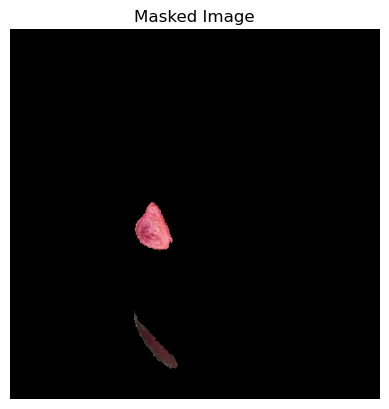

(512, 512, 3)


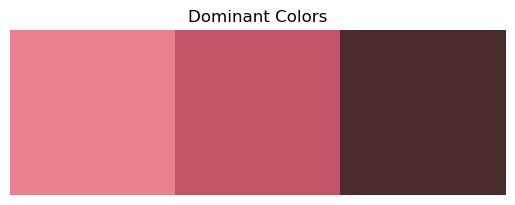

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy.cluster.vq import kmeans
import pandas as pd

# Step 1: Load the original image and the mask
image = cv2.imread('/Users/Swetha/Downloads/data_wound_seg/healthy/rgb20.png')  # Replace with your image path
mask = cv2.imread('/Users/Swetha/Downloads/data_wound_seg/healthy/mask20.png', cv2.IMREAD_GRAYSCALE)  # Load the mask as grayscale

# Ensure the mask is binary (0 or 255 values)
_, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

# Step 2: Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Step 3: Show the masked image for visualization in Jupyter Notebook
# Convert BGR to RGB for correct display in matplotlib
masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Display the masked image using matplotlib
plt.imshow(masked_image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.title("Masked Image")
plt.show()

# Step 4: Save the masked image (if required)
cv2.imwrite('masked_image.png', masked_image)

# Step 5: Process the masked image to find dominant colors
batman_image = img.imread('masked_image.png')  # Read the saved masked image

# Print the shape of the image
print(batman_image.shape)

# Extract masked pixels where the mask is white (255)
masked_pixels = batman_image[mask == 255]

# Extract R, G, B values from the masked region
r, g, b = masked_pixels[:, 0], masked_pixels[:, 1], masked_pixels[:, 2]

# Save the RGB values as a DataFrame
batman_df = pd.DataFrame({'red': r, 'green': g, 'blue': b})

# Perform KMeans clustering to find the 3 dominant colors
cluster_centers, _ = kmeans(batman_df[['red', 'green', 'blue']], 3)

dominant_colors = []

# Rescale the cluster centers back to the original RGB range [0, 255]
for cluster_center in cluster_centers:
    red, green, blue = cluster_center
    dominant_colors.append((
        max(0, min(255, red)),  # Ensure within 0-255 range
        max(0, min(255, green)),  # Ensure within 0-255 range
        max(0, min(255, blue))  # Ensure within 0-255 range
    ))

# Step 6: Display the dominant colors
plt.imshow([dominant_colors])
plt.axis('off')  # Hide axes for better visualization
plt.title("Dominant Colors")
plt.show()


In [46]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# Assuming you've already loaded the saved dominant colors (healthy_colors, ischemic_colors, infected_colors)
# and your input image's dominant colors are stored in the `dominant_colors` list (RGB values).

# Convert the list of dominant colors to numpy arrays for easier manipulation
input_dominant_colors = np.array(dominant_colors)

# Function to calculate Euclidean distance between input dominant colors and category dominant colors
def calculate_distance(input_colors, category_colors):
    # Calculate Euclidean distance between each input color and each category color
    distance_matrix = cdist(input_colors, category_colors, metric='euclidean')
    return distance_matrix

# Convert the CSVs to numpy arrays of RGB values
# Example: Load healthy colors from CSV (already assumed to be loaded in `healthy_colors` DataFrame)
healthy_colors = pd.read_csv('/Users/Swetha/Downloads/data_wound_seg/healthy.csv')  # Replace with actual path
ischemic_colors = pd.read_csv('/Users/Swetha/Downloads/data_wound_seg/ischemic.csv')  # Replace with actual path
infected_colors = pd.read_csv('/Users/Swetha/Downloads/data_wound_seg/infected.csv')  # Replace with actual path

# Convert the DataFrame to numpy arrays for easy distance calculations
healthy_colors_array = healthy_colors[['red', 'green', 'blue']].values
ischemic_colors_array = ischemic_colors[['red', 'green', 'blue']].values
infected_colors_array = infected_colors[['red', 'green', 'blue']].values

# Calculate distance between input image's dominant colors and each category's dominant colors
healthy_distance = calculate_distance(input_dominant_colors, healthy_colors_array)
ischemic_distance = calculate_distance(input_dominant_colors, ischemic_colors_array)
infected_distance = calculate_distance(input_dominant_colors, infected_colors_array)

# For each category, find the minimum distance and corresponding category
min_healthy_distance = np.min(healthy_distance)
min_ischemic_distance = np.min(ischemic_distance)
min_infected_distance = np.min(infected_distance)

# Find the category with the smallest distance
if min_healthy_distance <= min_ischemic_distance and min_healthy_distance <= min_infected_distance:
    category = "Healthy"
elif min_ischemic_distance <= min_healthy_distance and min_ischemic_distance <= min_infected_distance:
    category = "Ischemic"
else:
    category = "Infected"

# Output the closest category
print(f"The input image's dominant color matches the '{category}' category with the smallest distance.")


The input image's dominant color matches the 'Healthy' category with the smallest distance.
